In [1]:
import json
import pickle
import os

from plotter import *

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v2023.3.0 (target date: 31 Mar 2023), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
year = '2016APV'
if not os.path.isdir(year):
    os.mkdir(year)

pickle_path = '../../output/pickle/vhbb_official_v4/'+year+'/ParticleNet_msd.pkl'

In [3]:
ParticleNet_WorkingPoints = {
    '2016APV_bb':    [0.0, 0.9088, 0.9737, 0.9883],
    '2016APV_cc':    [0.0, 0.9252, 0.9751, 0.9909],

    '2016_bb': [0.0, 0.9137, 0.9735, 0.9883],
    '2016_cc': [0.0, 0.9252, 0.9743, 0.9905],

    '2017_bb':    [0.0, 0.9105, 0.9714, 0.9870],
    '2017_cc':    [0.0, 0.9347, 0.9765, 0.9909],

    '2018_bb':    [0.0, 0.9172, 0.9734, 0.9880],
    '2018_cc':    [0.0, 0.9368, 0.9777, 0.9917]
}

ddbthr = ParticleNet_WorkingPoints[year+'_bb'][-1]
print(ddbthr)

0.9883


In [4]:
vh = pickle.load(open(pickle_path,'rb')).integrate('region','signal')

In [5]:
vh_pass = vh.sum('pt1','msd2').integrate('bb1',int_range=slice(ddbthr,1))
vh_fail = vh.sum('pt1','msd2').integrate('bb1',int_range=slice(0,ddbthr))

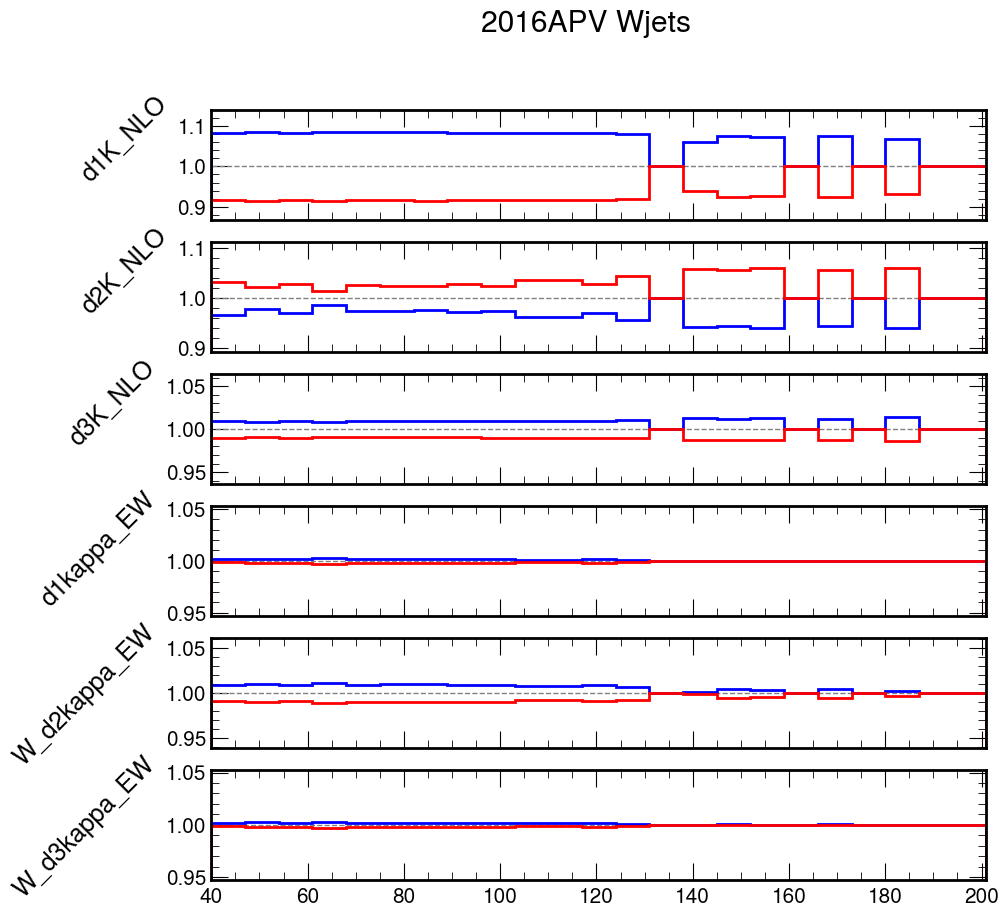

In [6]:
s = 'Wjets'
plot_syst_Vjets(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+year+'_'+s+'_msd1')

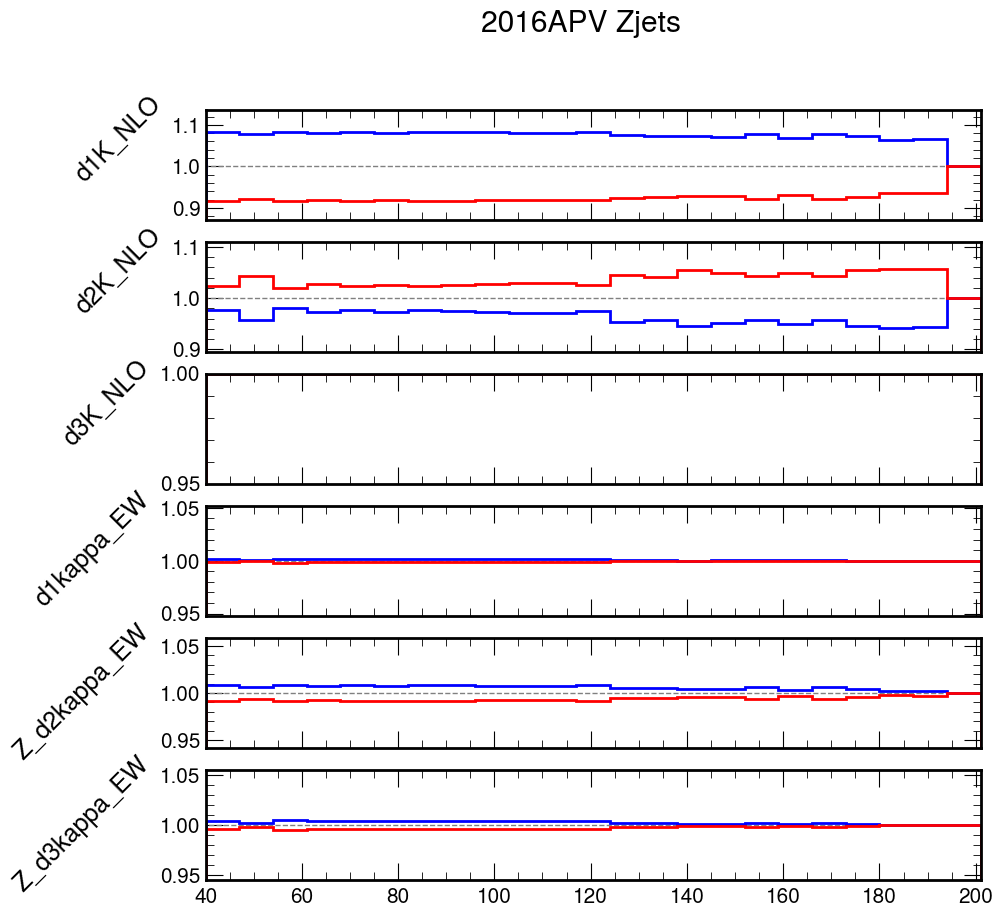

In [7]:
s = 'Zjets'
plot_syst_Vjets(vh_pass, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+year+'_'+s+'_msd1')